100%|██████████| 170M/170M [00:04<00:00, 35.1MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/10, Loss: 2.1563177877664566
Epoch 2/10, Loss: 1.9023835399150848
Epoch 3/10, Loss: 1.8032545540332794
Epoch 4/10, Loss: 1.7463916335105896
Epoch 5/10, Loss: 1.7084104961156845
Epoch 6/10, Loss: 1.680741810798645
Epoch 7/10, Loss: 1.6582819267511368
Epoch 8/10, Loss: 1.6401067807674408
Epoch 9/10, Loss: 1.6239689192771911
Epoch 10/10, Loss: 1.610299245119095


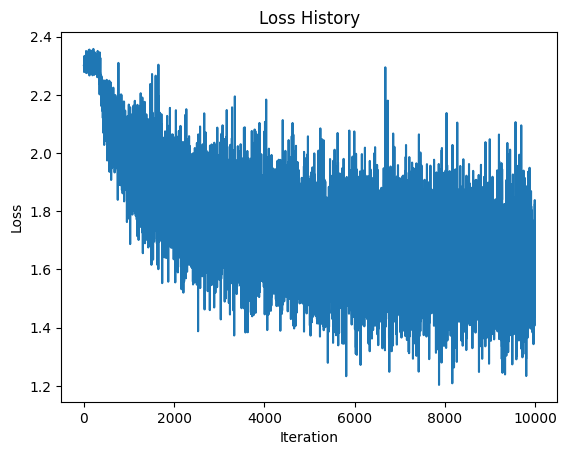

Training accuracy: 44.51%
Test accuracy: 43.35%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100             # Hidden layer size
K = 10              # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w1 = torch.randn(Din, H) * std  # Weights for input to hidden layer
b1 = torch.zeros(H)             # Bias for hidden layer
w2 = torch.randn(H, K) * std     # Weights for hidden to output layer
b2 = torch.zeros(K)              # Bias for output layer

# Hyperparameters
epochs = 10
lr = 1e-3  # Learning rate
lr_decay = 0.9  # Learning rate decay
loss_history = []

# 3. Training Loop
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Forward pass
        hidden = torch.sigmoid(x_train.mm(w1) + b1)  # Hidden layer activation
        y_pred = hidden.mm(w2) + b2  # Output layer activation

        # Loss calculation (Cross-Entropy Loss)
        loss = nn.functional.cross_entropy(y_pred, labels)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = torch.softmax(y_pred, dim=1) - nn.functional.one_hot(labels, K).float()
        dw2 = hidden.t().mm(dy_pred)
        db2 = dy_pred.sum(dim=0)

        dhidden = dy_pred.mm(w2.t()) * hidden * (1 - hidden)  # Sigmoid derivative
        dw1 = x_train.t().mm(dhidden)
        db1 = dhidden.sum(dim=0)

        # Parameter update
        w2 -= lr * dw2
        b2 -= lr * db2
        w1 -= lr * dw1
        b1 -= lr * db1

    # Print loss for every epoch
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(trainloader)}")
    lr *= lr_decay  # Learning rate decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        hidden = torch.sigmoid(x_train.mm(w1) + b1)
        y_train_pred = hidden.mm(w2) + b2
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        hidden = torch.sigmoid(x_test.mm(w1) + b1)
        y_test_pred = hidden.mm(w2) + b2
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.11MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 483kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.46MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.14MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/10], Loss: 0.2782
Epoch [2/10], Loss: 0.0895
Epoch [4/10], Loss: 0.0490
Epoch [5/10], Loss: 0.0398
Epoch [6/10], Loss: 0.0334
Epoch [7/10], Loss: 0.0275
Epoch [8/10], Loss: 0.0241
Epoch [9/10], Loss: 0.0205
Epoch [10/10], Loss: 0.0174


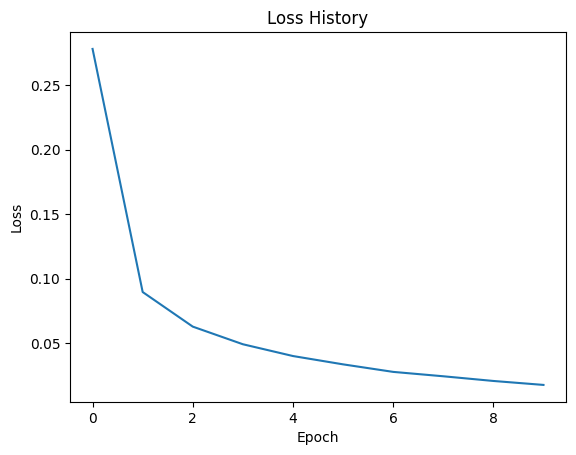

Training Accuracy: 99.53%
Test Accuracy: 98.43%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading for MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
batch_size = 64
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

# 2. Define the LeNet-5 Model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.tanh(self.conv1(x)))     # First conv layer + pool + activation
        x = self.pool(torch.tanh(self.conv2(x)))     # Second conv layer + pool + activation
        x = x.view(-1, 16 * 5 * 5)                   # Flatten for fully connected layers
        x = torch.tanh(self.fc1(x))                  # First fully connected layer + activation
        x = torch.tanh(self.fc2(x))                  # Second fully connected layer + activation
        x = self.fc3(x)                              # Final layer without activation (for logits)
        return x

# Initialize model, loss, and optimizer
model = LeNet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3. Training the Model
epochs = 10
loss_history = []

for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    loss_history.append(running_loss / len(trainloader))
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(trainloader):.4f}")

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Training Accuracy
correct_train = 0
total_train = 0
with torch.no_grad():
    for inputs, labels in trainloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training Accuracy: {train_acc:.2f}%")

# 6. Calculate Test Accuracy
correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test Accuracy: {test_acc:.2f}%")


In [ ]:
import kagglehub
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
import time
import copy
import os

# Download the Hymenoptera dataset using kagglehub
path = kagglehub.dataset_download("thedatasith/hymenoptera")
print("Path to dataset files:", path)

# Define paths for train and validation data
data_dir = os.path.join(path, "hymenoptera")

# Load the pre-trained ResNet18 model
model = models.resnet18(pretrained=True)

# Modify the final layer for binary classification (ants and bees)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

# Define data transformations for training and validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Load the Hymenoptera dataset
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=32, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

# Set device to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define the loss function, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Define the training function
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    model.load_state_dict(best_model_wts)
    return model

# Train and fine-tune the model
model_ft = train_model(model, criterion, optimizer, scheduler, num_epochs=25)


100%|██████████| 45.6M/45.6M [00:00<00:00, 137MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/thedatasith/hymenoptera/versions/5


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 167MB/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current 

Epoch 0/24
----------
train Loss: 0.5411 Acc: 0.7828
val Loss: 11.8165 Acc: 0.5686

Epoch 1/24
----------
train Loss: 0.6208 Acc: 0.8320
val Loss: 72.2745 Acc: 0.5490

Epoch 2/24
----------
train Loss: 0.4252 Acc: 0.8320
val Loss: 10.7037 Acc: 0.6471

Epoch 3/24
----------
train Loss: 0.3837 Acc: 0.8279
val Loss: 1.9756 Acc: 0.7582

Epoch 4/24
----------
train Loss: 0.3960 Acc: 0.8320
val Loss: 2.9002 Acc: 0.4837

Epoch 5/24
----------
train Loss: 0.3697 Acc: 0.8115
val Loss: 0.4977 Acc: 0.8301

Epoch 6/24
----------
train Loss: 0.3076 Acc: 0.8566
val Loss: 0.5276 Acc: 0.8170

Epoch 7/24
----------
train Loss: 0.2081 Acc: 0.9262
val Loss: 0.3928 Acc: 0.8366

Epoch 8/24
----------
train Loss: 0.2416 Acc: 0.9057
val Loss: 0.3269 Acc: 0.8562

Epoch 9/24
----------
train Loss: 0.2187 Acc: 0.9098
val Loss: 0.2879 Acc: 0.8954

Epoch 10/24
----------
train Loss: 0.2287 Acc: 0.9139
val Loss: 0.2840 Acc: 0.8889

Epoch 11/24
----------
train Loss: 0.1633 Acc: 0.9262
val Loss: 0.3082 Acc: 0.8758


In [ ]:
import kagglehub
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
import time
import copy
import os

# Download the Hymenoptera dataset
path = kagglehub.dataset_download("thedatasith/hymenoptera")
print("Path to dataset files:", path)

# Define paths for train and validation data
data_dir = os.path.join(path, "hymenoptera")

# Load the pre-trained ResNet18 model
model = models.resnet18(pretrained=True)

# Freeze all layers in the model (set requires_grad to False)
for param in model.parameters():
    param.requires_grad = False

# Modify the final layer for binary classification (ants and bees)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

# Move the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define data transformations for training and validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Load the Hymenoptera dataset
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=32, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)  # Only update parameters of the last layer

# Define the training function
def train_model(model, criterion, optimizer, num_epochs=25):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    model.load_state_dict(best_model_wts)
    return model

# Train the model using frozen layers (feature extractor)
model_ft = train_model(model, criterion, optimizer, num_epochs=25)


Path to dataset files: /root/.cache/kagglehub/datasets/thedatasith/hymenoptera/versions/5
Epoch 0/24
----------
train Loss: 0.7357 Acc: 0.5082
val Loss: 0.5847 Acc: 0.6928

Epoch 1/24
----------
train Loss: 0.6259 Acc: 0.6598
val Loss: 0.4916 Acc: 0.7974

Epoch 2/24
----------
train Loss: 0.4612 Acc: 0.8197
val Loss: 0.3622 Acc: 0.8954

Epoch 3/24
----------
train Loss: 0.3887 Acc: 0.8689
val Loss: 0.3182 Acc: 0.9150

Epoch 4/24
----------
train Loss: 0.3453 Acc: 0.8566
val Loss: 0.2714 Acc: 0.9281

Epoch 5/24
----------
train Loss: 0.3109 Acc: 0.8770
val Loss: 0.2493 Acc: 0.9281

Epoch 6/24
----------
train Loss: 0.2885 Acc: 0.8975
val Loss: 0.2290 Acc: 0.9412

Epoch 7/24
----------
train Loss: 0.2773 Acc: 0.9139
val Loss: 0.2158 Acc: 0.9346

Epoch 8/24
----------
train Loss: 0.2390 Acc: 0.9426
val Loss: 0.2103 Acc: 0.9542

Epoch 9/24
----------
train Loss: 0.2206 Acc: 0.9426
val Loss: 0.2038 Acc: 0.9542

Epoch 10/24
----------
train Loss: 0.2030 Acc: 0.9508
val Loss: 0.1882 Acc: 0.94